In [1]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os

# Add the scripts folder to the Python path
scripts_path = os.path.abspath('../scripts')
print(f"Scripts path: {scripts_path}")
sys.path.append(scripts_path)

# Now import the required functions
try:
    from data_extraction import load_data_from_postgres, load_data_using_sqlalchemy
    from sql_queries import execute_telecom_queries
    print("Imports successful")
except ImportError as e:
    print(f"Error importing modules: {e}")

Scripts path: /home/dura/Codes/week2/scripts
Imports successful


In [3]:
# SQL query
query = "SELECT * FROM xdr_data;"  

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Check if data was successfully loaded and display appropriate message
if df is not None:
    print("Successfully loaded the data")
    print(df.head())  # Display the first few rows of the dataframe
else:
    print("Failed to load data.")


/home/dura/Codes/week2/scripts/data_extraction.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          2024

In [12]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [4]:
import pandas as pd
import numpy as np

# Assuming df is the DataFrame containing the dataset
# Inspect the data
print("Data Overview:")
print(df.info())
print(df.describe())

# Handle missing values
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column] = df[column].fillna(df[column].mean())
    else:
        df[column] = df[column].fillna(df[column].mode()[0])

# Handle outliers (using IQR)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Verify that there are no NaN values left
print("Data after handling missing values and outliers:")
print(df.info())
print(df.describe())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg R

In [5]:
# Aggregate information per customer
customer_aggregates = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Handset Type': 'first',
    'Avg Bearer TP DL (kbps)': 'mean'
}).reset_index()

# Rename columns for clarity
customer_aggregates.rename(columns={
    'TCP DL Retrans. Vol (Bytes)': 'avg_tcp_retransmission',
    'Avg RTT DL (ms)': 'avg_rtt',
    'Handset Type': 'handset_type',
    'Avg Bearer TP DL (kbps)': 'avg_throughput'
}, inplace=True)

print("Aggregated customer information:")
print(customer_aggregates)

Aggregated customer information:
       MSISDN/Number  avg_tcp_retransmission     avg_rtt  \
0       3.360168e+10            1.525910e+07   66.991436   
1       3.360171e+10            2.080991e+07  110.000000   
2       3.360171e+10            5.751940e+05  145.000000   
3       3.360171e+10            1.798137e+07  104.397853   
4       3.360171e+10            2.080991e+07   29.000000   
...              ...                     ...         ...   
90033   3.370000e+10            2.080991e+07  109.795706   
90034   3.370000e+10            7.732280e+05  214.000000   
90035   3.370000e+10            6.785000e+03   20.000000   
90036   3.370000e+10            2.080991e+07  109.795706   
90037   3.373456e+10            1.449658e+07   74.134155   

                            handset_type  avg_throughput  
0             Samsung Galaxy A5 Sm-A520F     9263.906685  
1                Apple iPhone Se (A1723)       23.000000  
2                 Apple iPhone 6 (A1586)     7677.000000  
3      Sam

In [6]:
if 'MSISDN/Number' in df.columns:
    # Aggregate engagement metrics per customer
    engagement_metrics = df.groupby('MSISDN/Number').agg({
        'Bearer Id': 'count',  # Session frequency
        'Dur. (ms)': 'sum',    # Total session duration
        'Total DL (Bytes)': 'sum',  # Total download traffic
        'Total UL (Bytes)': 'sum'   # Total upload traffic
    }).reset_index()

    # Rename columns for clarity
    engagement_metrics.rename(columns={
        'Bearer Id': 'session_frequency',
        'Dur. (ms)': 'total_duration',
        'Total DL (Bytes)': 'total_download',
        'Total UL (Bytes)': 'total_upload'
    }, inplace=True)

    # Calculate total traffic
    engagement_metrics['total_traffic'] = engagement_metrics['total_download'] + engagement_metrics['total_upload']

    print("Aggregated engagement metrics:")
    print(engagement_metrics.head())
else:
    print("Column 'MSISDN/Number' does not exist in the dataframe.")

Aggregated engagement metrics:
   MSISDN/Number  session_frequency  total_duration  total_download  \
0   3.360168e+10                359      34112179.0    1.682756e+11   
1   3.360171e+10                  1         38503.0    2.934050e+08   
2   3.360171e+10                  1         52478.0    8.621012e+08   
3   3.360171e+10                  2        120298.0    1.498037e+09   
4   3.360171e+10                  1        176022.0    1.333844e+08   

   total_upload  total_traffic  
0  1.467565e+10   1.829512e+11  
1  4.621197e+07   3.396170e+08  
2  3.850972e+07   9.006109e+08  
3  8.929984e+07   1.587337e+09  
4  4.494626e+07   1.783307e+08  


In [7]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the engagement metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['session_frequency', 'total_duration', 'total_traffic']])

# Run K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['cluster'] = kmeans.fit_predict(normalized_metrics)

print("Cluster assignments:")
print(engagement_metrics['cluster'].value_counts())


Cluster assignments:
cluster
0    90036
2        1
1        1
Name: count, dtype: int64


In [8]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# Assuming engagement_metrics DataFrame contains the normalized metrics and cluster assignments
# Calculate the centroid of the less engaged cluster (cluster 0)
less_engaged_centroid = engagement_metrics[engagement_metrics['cluster'] == 0][['session_frequency', 'total_duration', 'total_traffic']].mean().values

# Calculate the Euclidean distance between each user and the less engaged cluster centroid
engagement_metrics['engagement_score'] = euclidean_distances(engagement_metrics[['session_frequency', 'total_duration', 'total_traffic']], [less_engaged_centroid]).flatten()

print("Engagement scores assigned:")
print(engagement_metrics[['MSISDN/Number', 'engagement_score']])

Engagement scores assigned:
       MSISDN/Number  engagement_score
0       3.360168e+10      1.822609e+11
1       3.360171e+10      3.507461e+08
2       3.360171e+10      2.102479e+08
3       3.360171e+10      8.969741e+08
4       3.360171e+10      5.120324e+08
...              ...               ...
90033   3.370000e+10      1.370498e+08
90034   3.370000e+10      1.059622e+08
90035   3.370000e+10      2.092966e+08
90036   3.370000e+10      2.956096e+08
90037   3.373456e+10      1.202402e+13

[90038 rows x 2 columns]


In [9]:
# Aggregate experience metrics per customer
experience_metrics = df.groupby('MSISDN/Number').agg({
	'TCP DL Retrans. Vol (Bytes)': 'mean',
	'Avg RTT DL (ms)': 'mean',
	'Avg Bearer TP DL (kbps)': 'mean'
}).reset_index()

# Rename columns for clarity
experience_metrics.rename(columns={
	'TCP DL Retrans. Vol (Bytes)': 'avg_tcp_retransmission',
	'Avg RTT DL (ms)': 'avg_rtt',
	'Avg Bearer TP DL (kbps)': 'avg_throughput'
}, inplace=True)

# Merge with engagement_metrics to get the cluster information
experience_metrics = experience_metrics.merge(engagement_metrics[['MSISDN/Number', 'cluster']], on='MSISDN/Number', how='left')

# Calculate the centroid of the worst experience cluster (cluster 0)
worst_experience_centroid = experience_metrics[experience_metrics['cluster'] == 0][['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']].mean().values

# Ensure there are no NaN values in the experience metrics
experience_metrics = experience_metrics.fillna(experience_metrics.mean())

# Calculate the Euclidean distance between each user and the worst experience cluster centroid
experience_metrics['experience_score'] = euclidean_distances(experience_metrics[['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']], [worst_experience_centroid]).flatten()

print("Experience scores assigned:")
print(experience_metrics[['MSISDN/Number', 'experience_score']].head())

Experience scores assigned:
   MSISDN/Number  experience_score
0   3.360168e+10      6.427995e+05
1   3.360171e+10      6.193619e+06
2   3.360171e+10      1.404111e+07
3   3.360171e+10      3.365097e+06
4   3.360171e+10      6.193619e+06


In [10]:
# Merge engagement and experience scores into a single DataFrame
satisfaction_metrics = pd.merge(engagement_metrics[['MSISDN/Number', 'engagement_score']], experience_metrics[['MSISDN/Number', 'experience_score']], on='MSISDN/Number')

# Calculate the satisfaction score as the average of engagement and experience scores
satisfaction_metrics['satisfaction_score'] = satisfaction_metrics[['engagement_score', 'experience_score']].mean(axis=1)

# Report the top 10 satisfied customers
top_10_satisfied_customers = satisfaction_metrics.nlargest(10, 'satisfaction_score')

print("Top 10 satisfied customers:")
print(top_10_satisfied_customers)

Top 10 satisfied customers:
       MSISDN/Number  engagement_score  experience_score  satisfaction_score
90037   3.373456e+10      1.202402e+13      1.197442e+05        6.012011e+12
0       3.360168e+10      1.822609e+11      6.427995e+05        9.113075e+10
6173    3.361489e+10      8.155864e+09      7.076210e+06        4.081470e+09
12916   3.362578e+10      7.809259e+09      9.070026e+04        3.904675e+09
13262   3.362632e+10      7.280805e+09      1.880125e+06        3.641343e+09
76099   3.367588e+10      7.200748e+09      3.949427e+06        3.602349e+09
36788   3.365973e+10      7.015501e+09      9.400617e+06        3.512451e+09
62764   3.366646e+10      6.618138e+09      3.191959e+06        3.310665e+09
56977   3.366471e+10      6.181984e+09      4.740152e+06        3.093362e+09
86191   3.369879e+10      5.850537e+09      2.041694e+06        2.926289e+09


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for regression
X = satisfaction_metrics[['engagement_score', 'experience_score']]
y = satisfaction_metrics['satisfaction_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict satisfaction scores on the test set
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.3893840503634704e-09
R-squared: 1.0


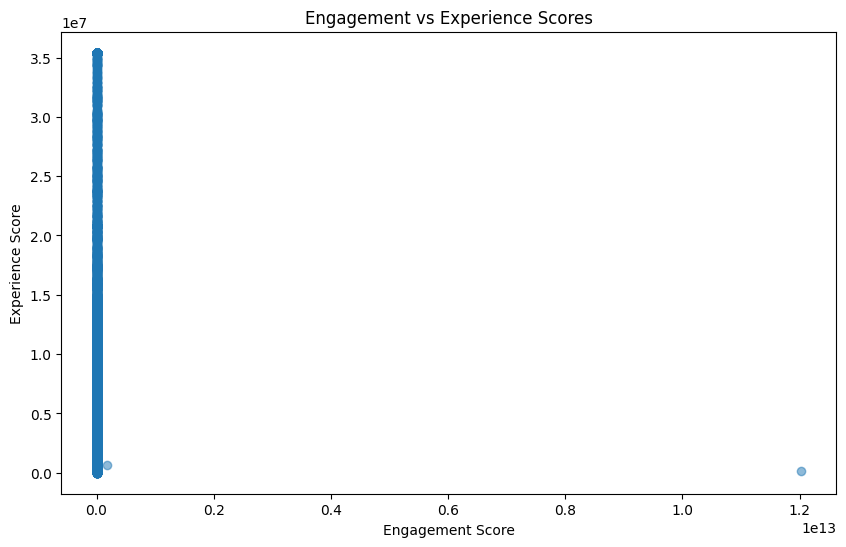

In [12]:
import matplotlib.pyplot as plt

# Plot engagement and experience scores
plt.figure(figsize=(10, 6))
plt.scatter(satisfaction_metrics['engagement_score'], satisfaction_metrics['experience_score'], alpha=0.5)
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('Engagement vs Experience Scores')
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# Normalize the engagement and experience scores
scaler = StandardScaler()
satisfaction_metrics[['engagement_score', 'experience_score']] = scaler.fit_transform(satisfaction_metrics[['engagement_score', 'experience_score']])

# Re-run KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
satisfaction_metrics['cluster'] = kmeans.fit_predict(satisfaction_metrics[['engagement_score', 'experience_score']])

print("Cluster assignments after normalization:")
print(satisfaction_metrics['cluster'].value_counts())


Cluster assignments after normalization:
cluster
0    90037
1        1
Name: count, dtype: int64


In [23]:
from sklearn.cluster import KMeans

# Run K-Means clustering with k=2 on engagement and experience scores
kmeans = KMeans(n_clusters=2, random_state=42)
satisfaction_metrics['cluster'] = kmeans.fit_predict(satisfaction_metrics[['engagement_score', 'experience_score']])

print("Cluster assignments:")
print(satisfaction_metrics['cluster'].value_counts())

Cluster assignments:
cluster
0    90037
1        1
Name: count, dtype: int64


In [26]:
# Identify the user(s) in Cluster 1
outlier_user = satisfaction_metrics[satisfaction_metrics['cluster'] == 1]
print(outlier_user)


       MSISDN/Number  engagement_score  experience_score  satisfaction_score  \
90037   3.373456e+10        300.015864         -1.643452        6.012011e+12   

       cluster  
90037        1  


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Assuming you have already calculated 'engagement_score' and 'experience_score'

# Step 1: Normalize the engagement and experience scores
scaler = StandardScaler()

# Normalize the engagement_score and experience_score before clustering
satisfaction_metrics = satisfaction_metrics.copy()
satisfaction_metrics[['engagement_score', 'experience_score']] = scaler.fit_transform(
    satisfaction_metrics[['engagement_score', 'experience_score']]
)

# Step 2: Run K-Means clustering with k=2 on normalized engagement and experience scores
kmeans = KMeans(n_clusters=2, random_state=42)
satisfaction_metrics['cluster'] = kmeans.fit_predict(satisfaction_metrics[['engagement_score', 'experience_score']])

# Step 3: Print the cluster assignments
print("Cluster assignments:")
print(satisfaction_metrics['cluster'].value_counts())


Cluster assignments:
cluster
0    90037
1        1
Name: count, dtype: int64


In [14]:
from sklearn.cluster import KMeans

# Run K-Means clustering with k=2 on engagement and experience scores
kmeans = KMeans(n_clusters=2, random_state=42)
satisfaction_metrics['cluster'] = kmeans.fit_predict(satisfaction_metrics[['engagement_score', 'experience_score']])

print("Cluster assignments:")
print(satisfaction_metrics['cluster'].value_counts())

Cluster assignments:
cluster
0    90037
1        1
Name: count, dtype: int64


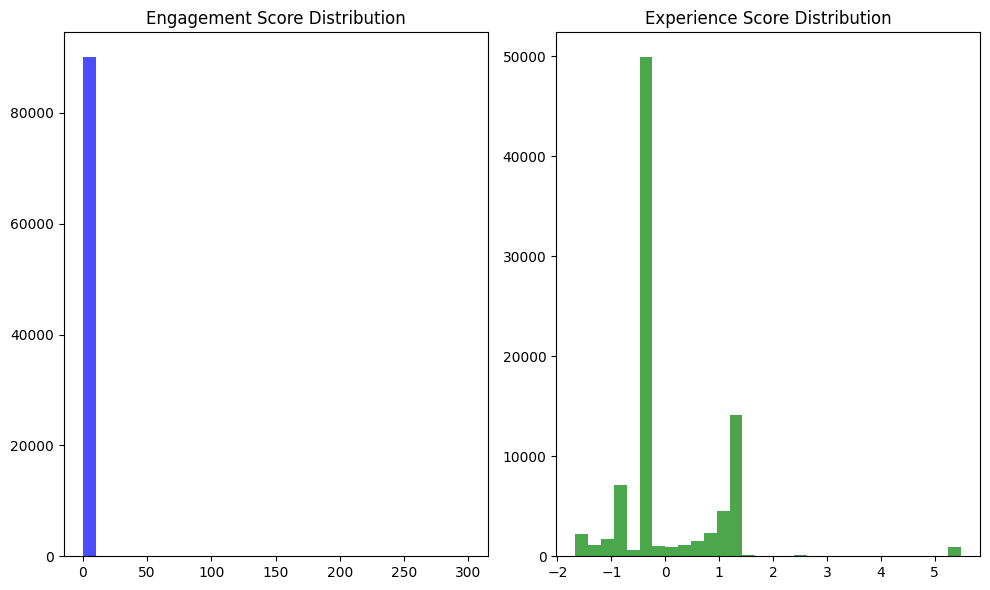

In [15]:
# Check distribution of engagement and experience scores
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(satisfaction_metrics['engagement_score'], bins=30, color='blue', alpha=0.7)
plt.title('Engagement Score Distribution')

plt.subplot(1, 2, 2)
plt.hist(satisfaction_metrics['experience_score'], bins=30, color='green', alpha=0.7)
plt.title('Experience Score Distribution')

plt.tight_layout()
plt.show()


In [26]:
from sklearn.cluster import KMeans

# Run K-Means clustering with k=2 on engagement and experience scores
kmeans = KMeans(n_clusters=2, random_state=42)
satisfaction_metrics['cluster'] = kmeans.fit_predict(satisfaction_metrics[['engagement_score', 'experience_score']])

print("Cluster assignments:")
print(satisfaction_metrics['cluster'].value_counts())


Cluster assignments:
cluster
0    90037
1        1
Name: count, dtype: int64


In [30]:
# Aggregate the average satisfaction and experience score per cluster
cluster_aggregates = satisfaction_metrics.groupby('cluster').agg({
    'engagement_score': 'mean',
    'experience_score': 'mean',
    'satisfaction_score': 'mean'
}).reset_index()

print("Cluster aggregates:")
print(cluster_aggregates)

Cluster aggregates:
   cluster  engagement_score  experience_score  satisfaction_score
0        0         -0.003332          0.000018        1.760717e+08
1        1        300.015864         -1.643452        6.012011e+12


In [16]:
import psycopg2

# Connect to PostgreSQL database
conn = psycopg2.connect(
    host='localhost',
    user='postgres',
    password='duresa',
    dbname='telecom_data'
)

# Create a cursor object
cursor = conn.cursor()

# Create a table for the satisfaction metrics
cursor.execute("""
    CREATE TABLE IF NOT EXISTS satisfaction_metrics (
        MSISDN_Number VARCHAR(255),
        engagement_score FLOAT,
        experience_score FLOAT,
        satisfaction_score FLOAT,
        cluster INT
    )
""")

# Insert data into the table
for index, row in satisfaction_metrics.iterrows():
    cursor.execute("""
        INSERT INTO satisfaction_metrics (MSISDN_Number, engagement_score, experience_score, satisfaction_score, cluster)
        VALUES (%s, %s, %s, %s, %s)
    """, (str(row['MSISDN/Number']), float(row['engagement_score']), float(row['experience_score']), float(row['satisfaction_score']), int(row['cluster'])))

# Commit the transaction
conn.commit()

# Close the connection
cursor.close()
conn.close()

print("Data exported to PostgreSQL database.")

Data exported to PostgreSQL database.


In [20]:
import psycopg2


from tabulate import tabulate

# Connect to PostgreSQL database
conn = psycopg2.connect(
    host='localhost',
    user='postgres',
    password='duresa',
    dbname='telecom_data'
)

# Create a cursor object
cursor = conn.cursor()

# Execute a select query
cursor.execute("SELECT * FROM satisfaction_metrics LIMIT 15")

# Fetch the results
results = cursor.fetchall()

# Retrieve column names
column_names = [desc[0] for desc in cursor.description]

# Print results with column names
print(tabulate(results, headers=column_names, tablefmt="psql"))

# Close the connection
cursor.close()
conn.close()


+-----------------+--------------------+--------------------+----------------------+-----------+
|   msisdn_number |   engagement_score |   experience_score |   satisfaction_score |   cluster |
|-----------------+--------------------+--------------------+----------------------+-----------|
|     3.36017e+10 |        4.53593     |          -1.53778  |          9.11308e+10 |         0 |
|     3.36017e+10 |       -0.00316103  |          -0.4164   |          1.7847e+08  |         0 |
|     3.36017e+10 |       -0.00666679  |           1.16896  |          1.12145e+08 |         0 |
|     3.36017e+10 |        0.0104687   |          -0.987822 |          4.5017e+08  |         0 |
|     3.36017e+10 |        0.000863445 |          -0.4164   |          2.59113e+08 |         0 |
|     3.36017e+10 |       -0.00303813  |          -0.4164   |          1.80933e+08 |         0 |
|     3.36017e+10 |        0.00368502  |          -0.416401 |          3.15652e+08 |         0 |
|     3.36017e+10 |        0.0